In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999

In [17]:
df = pd.read_csv('all_conditions.csv', parse_dates=['Date'])

In [18]:
df.head()

,Stn Id,Stn Name,CIMIS Region,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Target
0,2,FivePoints,San Joaquin Valley,2018-01-01,0.06,0.00,219.0,7.3,63.4,35.3,47.8,82.0,46.0,65.0,36.6,3.3,78.3,51.1,0
1,2,FivePoints,San Joaquin Valley,2018-01-02,0.04,0.00,127.0,7.4,59.8,37.7,47.2,80.0,52.0,67.0,36.7,3.1,74.5,51.3,0
2,2,FivePoints,San Joaquin Valley,2018-01-03,0.04,0.00,125.0,8.4,61.1,37.3,49.9,79.0,49.0,68.0,39.9,4.5,107.5,51.3,0
3,2,FivePoints,San Joaquin Valley,2018-01-04,0.07,0.01,219.0,11.6,69.2,48.7,56.8,94.0,52.0,74.0,48.5,5.8,140.2,53.0,0
4,2,FivePoints,San Joaquin Valley,2018-01-05,0.07,0.00,239.0,12.7,73.8,47.5,59.8,94.0,49.0,72.0,50.8,4.2,101.4,54.4,0


In [19]:
df.info

<bound method DataFrame.info of         Stn Id    Stn Name        CIMIS Region       Date  ETo (in)  \
0            2  FivePoints  San Joaquin Valley 2018-01-01      0.06   
1            2  FivePoints  San Joaquin Valley 2018-01-02      0.04   
2            2  FivePoints  San Joaquin Valley 2018-01-03      0.04   
3            2  FivePoints  San Joaquin Valley 2018-01-04      0.07   
4            2  FivePoints  San Joaquin Valley 2018-01-05      0.07   
...        ...         ...                 ...        ...       ...   
128120     262      Linden  San Joaquin Valley 2020-09-14      0.14   
128121     262      Linden  San Joaquin Valley 2020-09-15      0.15   
128122     262      Linden  San Joaquin Valley 2020-09-16      0.15   
128123     262      Linden  San Joaquin Valley 2020-09-17      0.16   
128124     262      Linden  San Joaquin Valley 2020-09-18      0.14   

        Precip (in)  Sol Rad (Ly/day)  Avg Vap Pres (mBars)  Max Air Temp (F)  \
0              0.00             21

In [20]:
df.isnull().sum()

Stn Id                   0
Stn Name                 0
CIMIS Region             0
Date                     0
ETo (in)                83
Precip (in)              0
Sol Rad (Ly/day)         0
Avg Vap Pres (mBars)     0
Max Air Temp (F)         3
Min Air Temp (F)         1
Avg Air Temp (F)         5
Max Rel Hum (%)          0
Min Rel Hum (%)          0
Avg Rel Hum (%)         13
Dew Point (F)           13
Avg Wind Speed (mph)     0
Wind Run (miles)         0
Avg Soil Temp (F)       20
Target                   0
dtype: int64

In [21]:
df['Target'].unique()

array([0, 1], dtype=int64)

In [22]:
print(f"Null percentage of Average Temperature feature: {((df['ETo (in)'].isnull().sum())/(len(df))*100).round(2)}%")

Null percentage of Average Temperature feature: 0.06%


In [23]:
df.dropna(inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128009 entries, 0 to 128124
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Stn Id                128009 non-null  int64         
 1   Stn Name              128009 non-null  object        
 2   CIMIS Region          128009 non-null  object        
 3   Date                  128009 non-null  datetime64[ns]
 4   ETo (in)              128009 non-null  float64       
 5   Precip (in)           128009 non-null  float64       
 6   Sol Rad (Ly/day)      128009 non-null  float64       
 7   Avg Vap Pres (mBars)  128009 non-null  float64       
 8   Max Air Temp (F)      128009 non-null  float64       
 9   Min Air Temp (F)      128009 non-null  float64       
 10  Avg Air Temp (F)      128009 non-null  float64       
 11  Max Rel Hum (%)       128009 non-null  float64       
 12  Min Rel Hum (%)       128009 non-null  float64       
 13 

# Understanding Dataset

Data source: https://www.kaggle.com/chelseazaloumis/cimis-dataset-with-fire-target

Context Explore an environmental conditions dataframe scrapped from CIMIS (California Irrigation Management Information System) weather stations using a selenium chromedriver. With California's wildfires setting records in 2020, it is worthwhile to explore factors that may contribute to creating at risk environments.

Acknowledgements CIMIS: https://cimis.water.ca.gov/Default.aspx

Column on dataset:

1. Station Id: California weather station IDs
2. Station Name: California weather station names
3. CIMIS region: Regions in California State
4. Date: recorded date
5. ETo (in): Evapotranspiration; is the process whereby liquid water is converted to water vapour (vaporization) and removed from the evaporating surface (vapour removal) (http://www.fao.org/3/x0490e/x0490e04.htm). Water evaporates from a variety of surfaces, such as lakes, rivers, pavements, soils, and wet vegetation. Evapotranspiration unit in inch
6. Precip (m): Precipitation; is water released from clouds in the form of rain, freezing rain, sleet, snow, or hail. Most precipitation falls as rain (USGS gov: https://www.usgs.gov/special-topic/water-science-school/science/precipitation-and-water-cycle?qt-science_center_objects=0#qt-science_center_objects). Precipitation unit in meter.
7. Sol Rad (Ly/day): Solar Radiation; is the heat and light and other radiation given off by the sun (Book, 2002. Source: https://www.sciencedirect.com/topics/chemistry/solar-radiation)
8. Avg Vap Pres (mBars): Average Vapor Pressure; defined as the pressure exerted by a vapor that is in thermodynamic equilibrium with the condensed phase (solid or liquid) at a given temperature in a closed system (2019, Speight. Source: https://www.sciencedirect.com/topics/earth-and-planetary-sciences/vapour-pressure.
9. Max Air Temp, Min Air Tem, Avg Air Temperature: Maximum, minimum, and average air temperature, units in Fahrenheit.
10. Max Rel Hum, Min Rel Hum, Avg Rel Hum: Maximum, minimum, and average relative humidity, units in %%.
11. Dew Point (F); is the temperature to which a parcel of moist air must be cooled at constant atmospheric pressure and constant water vapor content in order for saturation to occur (2019, Camuffo. Source: https://www.sciencedirect.com/topics/earth-and-planetary-sciences/dew-point).
12. Avg Wind Speed (mph): Average wind speed, unit in miles per hour
13. Wind Run (miles): a meteorological term used to categorize or determine the total distance (or amount) of the travelled wind over a period of time. The readings are collected using an anemometer. Wind run can help to determine the rate of evaporation of moisture over a particular area.
14. Avg Soil Temp (F): Average Soil Temperature; the measurement of the warmth in soil.
15. Target: Target column, whether there is wildfires happen (1) or not (0).

# Project Goals:

1. Determine key factors that may contribute on California's wildfires causes.
2. Create machine learning model to predict probability of Wildfire based on input factors.

In [26]:
desc = []

for i in df.columns:
    desc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum())/(len(df)))*100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [27]:
dfDesc = pd.DataFrame(desc, columns=['dataFeatures', 'dataType', 'null', 'nullPercentage', 'unique', 'uniqueSample'])
dfDesc

,dataFeatures,dataType,null,nullPercentage,unique,uniqueSample
0,Stn Id,int64,0,0.0,143,"[214, 171]"
1,Stn Name,object,0,0.0,143,"[Victorville, Pajaro]"
2,CIMIS Region,object,0,0.0,14,"[Eastern Sierra Basin & Range, Imperial/Coache..."
3,Date,datetime64[ns],0,0.0,991,"[2020-05-13T00:00:00.000000000, 2019-03-23T00:..."
4,ETo (in),float64,0,0.0,50,"[0.28, 0.03]"
5,Precip (in),float64,0,0.0,312,"[3.41, 1.4]"
6,Sol Rad (Ly/day),float64,0,0.0,976,"[564.0, 25.0]"
7,Avg Vap Pres (mBars),float64,0,0.0,332,"[16.2, 7.4]"
8,Max Air Temp (F),float64,0,0.0,921,"[72.0, 57.4]"
9,Min Air Temp (F),float64,0,0.0,884,"[67.4, 23.4]"


# *There is no more null data

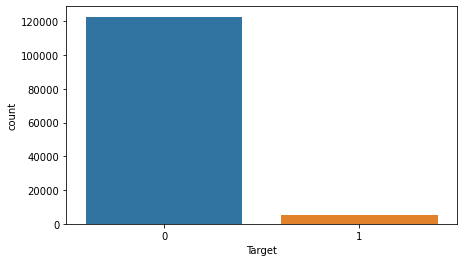

In [28]:
# check whether data in column target is balanced or not

plt.figure(figsize=(7, 4))
sns.countplot(x='Target', data=df)
plt.show()

# Data is imbalanced
Handling imbalanced data will be treated with Oversampling method (Machine Learning model building)

In [29]:
df['Target'].value_counts()

0    122681
1      5328
Name: Target, dtype: int64

In [30]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['date'] = df['Date'].dt.day

In [31]:
df.drop(columns=['Date'], inplace=True)

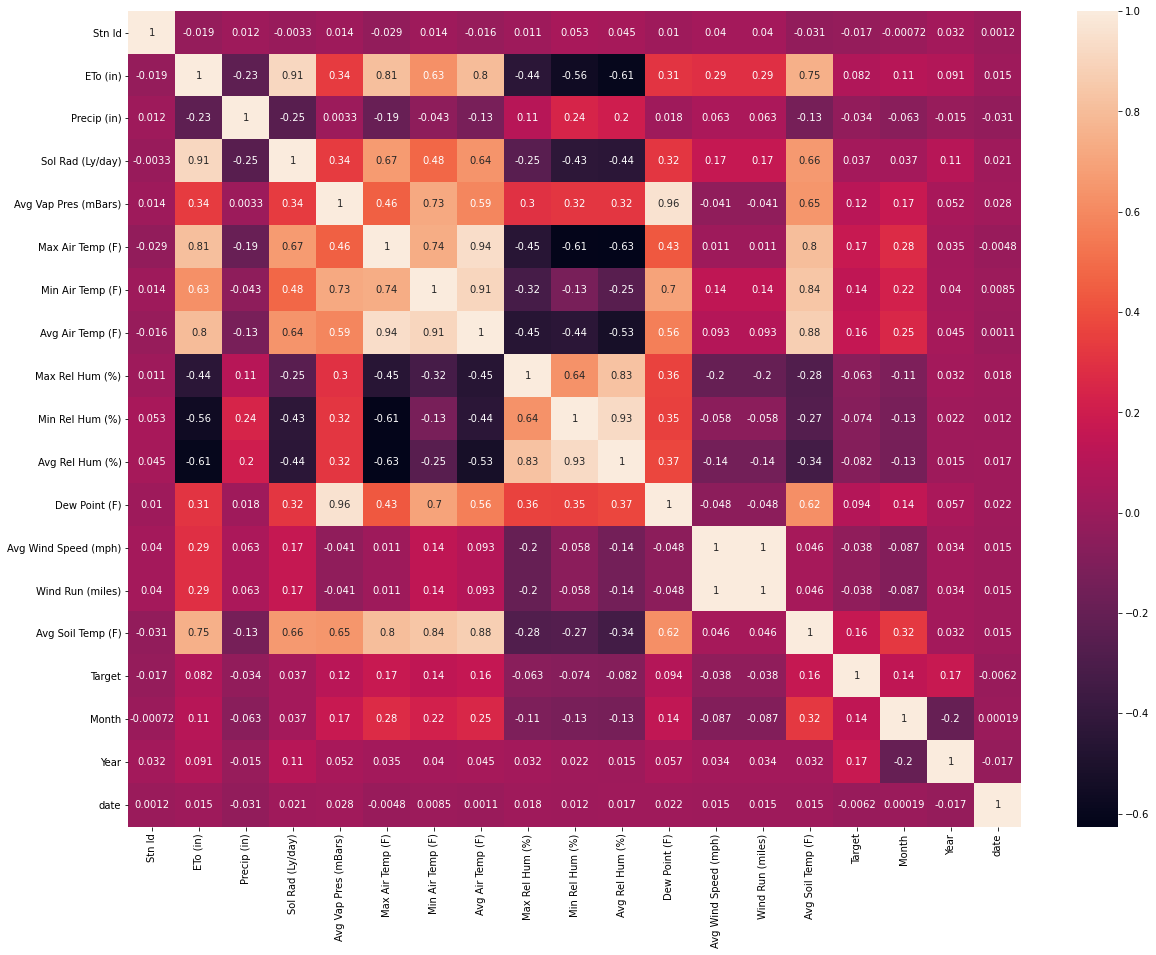

In [32]:
# Finding out factors related to California's Wildfires

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)


plt.xticks(rotation = 90)
plt.show()

From the figure above, it can be seen that features having correlation score higher farthest from 0 (indicates having correlation with target column) are features:

- Avg Vap Pres: 0.12
- Air temperatures; min, max, and average: 0.17, 0.4, 0.16
- Avg Soil temp: 0.16
- Month: 0.14
- Year: 0.17

Suspected factors that are correlated with wildfire are some kind related to temperature, such as air and solid temperatures. That being said, wildfire occurances can be predicted related to Season/Month. Hot/Summer season might likely to have higher potential in wildfire occurrences than cold/wet season.

# Machine Learning

In [34]:
df.head()

,Stn Id,Stn Name,CIMIS Region,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Target,Month,Year,date
0,2,FivePoints,San Joaquin Valley,0.06,0.00,219.0,7.3,63.4,35.3,47.8,82.0,46.0,65.0,36.6,3.3,78.3,51.1,0,1,2018,1
1,2,FivePoints,San Joaquin Valley,0.04,0.00,127.0,7.4,59.8,37.7,47.2,80.0,52.0,67.0,36.7,3.1,74.5,51.3,0,1,2018,2
2,2,FivePoints,San Joaquin Valley,0.04,0.00,125.0,8.4,61.1,37.3,49.9,79.0,49.0,68.0,39.9,4.5,107.5,51.3,0,1,2018,3
3,2,FivePoints,San Joaquin Valley,0.07,0.01,219.0,11.6,69.2,48.7,56.8,94.0,52.0,74.0,48.5,5.8,140.2,53.0,0,1,2018,4
4,2,FivePoints,San Joaquin Valley,0.07,0.00,239.0,12.7,73.8,47.5,59.8,94.0,49.0,72.0,50.8,4.2,101.4,54.4,0,1,2018,5


In [36]:
# some features are redundant to each other, so it's possible to eliminate one.

df.drop(columns=['Stn Id', 'Max Rel Hum (%)', 'Min Rel Hum (%)', 'date'], inplace=True)

In [37]:
# import model
from sklearn.model_selection import train_test_split

In [38]:
#split data

X = df.drop(columns=['Target'])
y = df['Target']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoostClassifier with Pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from xgboost import XGBClassifier

In [41]:
df.head()

,Stn Name,CIMIS Region,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Target,Month,Year
0,FivePoints,San Joaquin Valley,0.06,0.00,219.0,7.3,63.4,35.3,47.8,65.0,36.6,3.3,78.3,51.1,0,1,2018
1,FivePoints,San Joaquin Valley,0.04,0.00,127.0,7.4,59.8,37.7,47.2,67.0,36.7,3.1,74.5,51.3,0,1,2018
2,FivePoints,San Joaquin Valley,0.04,0.00,125.0,8.4,61.1,37.3,49.9,68.0,39.9,4.5,107.5,51.3,0,1,2018
3,FivePoints,San Joaquin Valley,0.07,0.01,219.0,11.6,69.2,48.7,56.8,74.0,48.5,5.8,140.2,53.0,0,1,2018
4,FivePoints,San Joaquin Valley,0.07,0.00,239.0,12.7,73.8,47.5,59.8,72.0,50.8,4.2,101.4,54.4,0,1,2018


In [42]:
df.keys()

Index(['Stn Name', 'CIMIS Region', 'ETo (in)', 'Precip (in)',
       'Sol Rad (Ly/day)', 'Avg Vap Pres (mBars)', 'Max Air Temp (F)',
       'Min Air Temp (F)', 'Avg Air Temp (F)', 'Avg Rel Hum (%)',
       'Dew Point (F)', 'Avg Wind Speed (mph)', 'Wind Run (miles)',
       'Avg Soil Temp (F)', 'Target', 'Month', 'Year'],
      dtype='object')

In [43]:
prep = ColumnTransformer([
    ('scaled', StandardScaler(), ['ETo (in)', 'Precip (in)', 'Sol Rad (Ly/day)', 'Avg Vap Pres (mBars)', 'Max Air Temp (F)',
       'Min Air Temp (F)', 'Avg Air Temp (F)', 'Avg Rel Hum (%)',
       'Dew Point (F)', 'Avg Wind Speed (mph)', 'Wind Run (miles)',
       'Avg Soil Temp (F)', 'Month', 'Year']),
    ('encode', OneHotEncoder(), ['Stn Name', 'CIMIS Region'])
])

In [44]:
model = Pipeline([
    ('prep', prep),
    ('algo', XGBClassifier())
])

In [45]:
model.fit(X_train, y_train)

[10:45:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('scaled', StandardScaler(),
                                                  ['ETo (in)', 'Precip (in)',
                                                   'Sol Rad (Ly/day)',
                                                   'Avg Vap Pres (mBars)',
                                                   'Max Air Temp (F)',
                                                   'Min Air Temp (F)',
                                                   'Avg Air Temp (F)',
                                                   'Avg Rel Hum (%)',
                                                   'Dew Point (F)',
                                                   'Avg Wind Speed (mph)',
                                                   'Wind Run (miles)',
                                                   'Avg Soil Temp (F)', 'Month',
                                                   'Year']),
                                  

In [46]:
y_pred = model.predict(X_test)

# Evaluation

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, accuracy_score, precision_score, roc_curve

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     36815
           1       0.87      0.80      0.84      1588

    accuracy                           0.99     38403
   macro avg       0.93      0.90      0.91     38403
weighted avg       0.99      0.99      0.99     38403



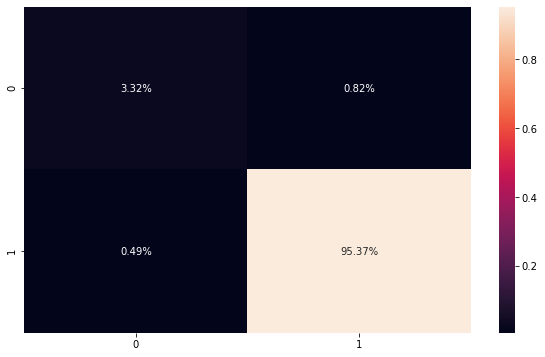

In [49]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
df = pd.DataFrame (cm,
                  columns=['Pred 1', 'Pred 0'],
                  index=['Act 1', 'Act 0'])
plt.figure(figsize=(10, 6))
# sns.heatmap(df, annot=True)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')
plt.show()

# Conclusion

1. Based on the data, the primary cause of California Wildfires are natural factors related to temperatures, such as air and soil temperatures.
2. Machine Learning model using XGBoostClassifier algorithm gives good evaluation in parameters such precision, recall, f1 score, and overall accuracy. This model can reduce the prediction of false negatif, that there is actually high potential of wildfire that predicted not.